# Chenyu Zhao
#### R version: 3.5.1

# MTH9879 Homework 1

Assigned: January 31, 2019.
Due: February 14, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

### Answer
The trader used "constant participation rate" strategy to split the sell order. Each child order is a fixed fraction of total trading volume over a given period of time. If the parent order is relatively large, then the child order will even bigger and accelate the execution.

This execution exhausted the market liquidity and caused a sharpe price drop. Then more new limit orders arrived and gave the market more liquidity and increased the price. So there is a big price movement. This impact spread to different markets quickly and one of the reason is the algorithmic trading.

If the strategy is modified by adding a constrain that trading less when price impact increase, this crash may be avoided.



### 2. (0 points) 

Read Chapters 3 and 8 of Trades, Quotes and Prices by Bouchaud et al., at least sections 8.1 to 8.5.  8.6 and 8.7 are optional.

## The Santa Fe zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [7]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")
library(repr)
options(repr.plot.width=10,repr.plot.height=7)

### 3. (4 points)

Using the provided functions in *ziSetup.R* (with $\lambda = 1$, $\mu = 10$, $\nu = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

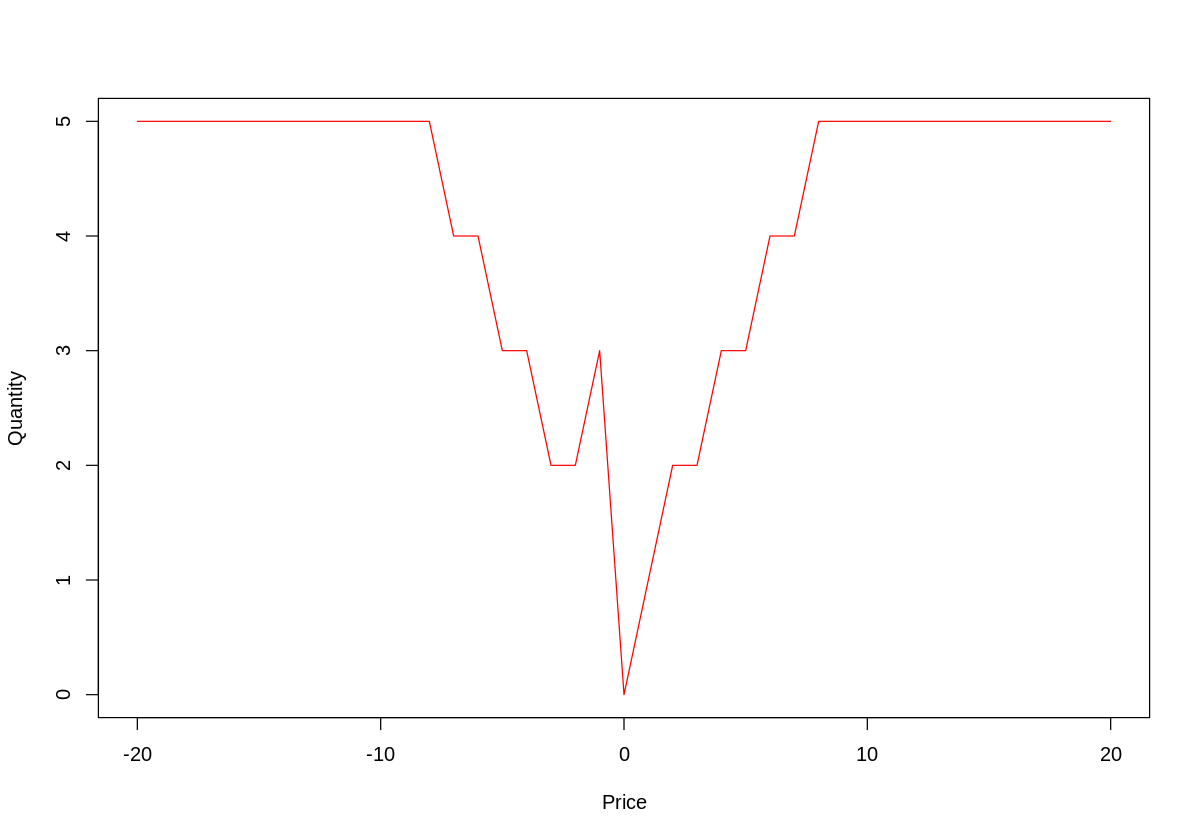

In [2]:
logging <- F 

lambda <- 1
mu <- 10
nu <- 1/5 

numEvents <- 10000 
initializeBook5()

# add two orders to the (best) bid side of the book
limitBuyOrder(bestBid())
limitBuyOrder(bestBid())

bookPlot(20)

### 4. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|#|$\lambda$|$\mu$|$\nu$|
-----|-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### (a)

In [3]:
logging <- F 

lambda <- 1
mus <- c(10,8,10,10)
nus <- c(1/5,1/5,1/6,1/8)
avgBookShapes<-as.data.frame(matrix(0,nrow=41,ncol=4))

for(i in 1:4){
    mu<-mus[i]
    nu<-nus[i]
    initializeBook5()

    numEvents <- 100000 # Average over 100,000 events
    avgBookShape <- bookShape(20)/numEvents
    for(count in 2:numEvents){
      generateEvent()
      avgBookShape <- avgBookShape+bookShape(20)/numEvents
    }

    avgBookShapes[,i]<-avgBookShape
}




### (b)

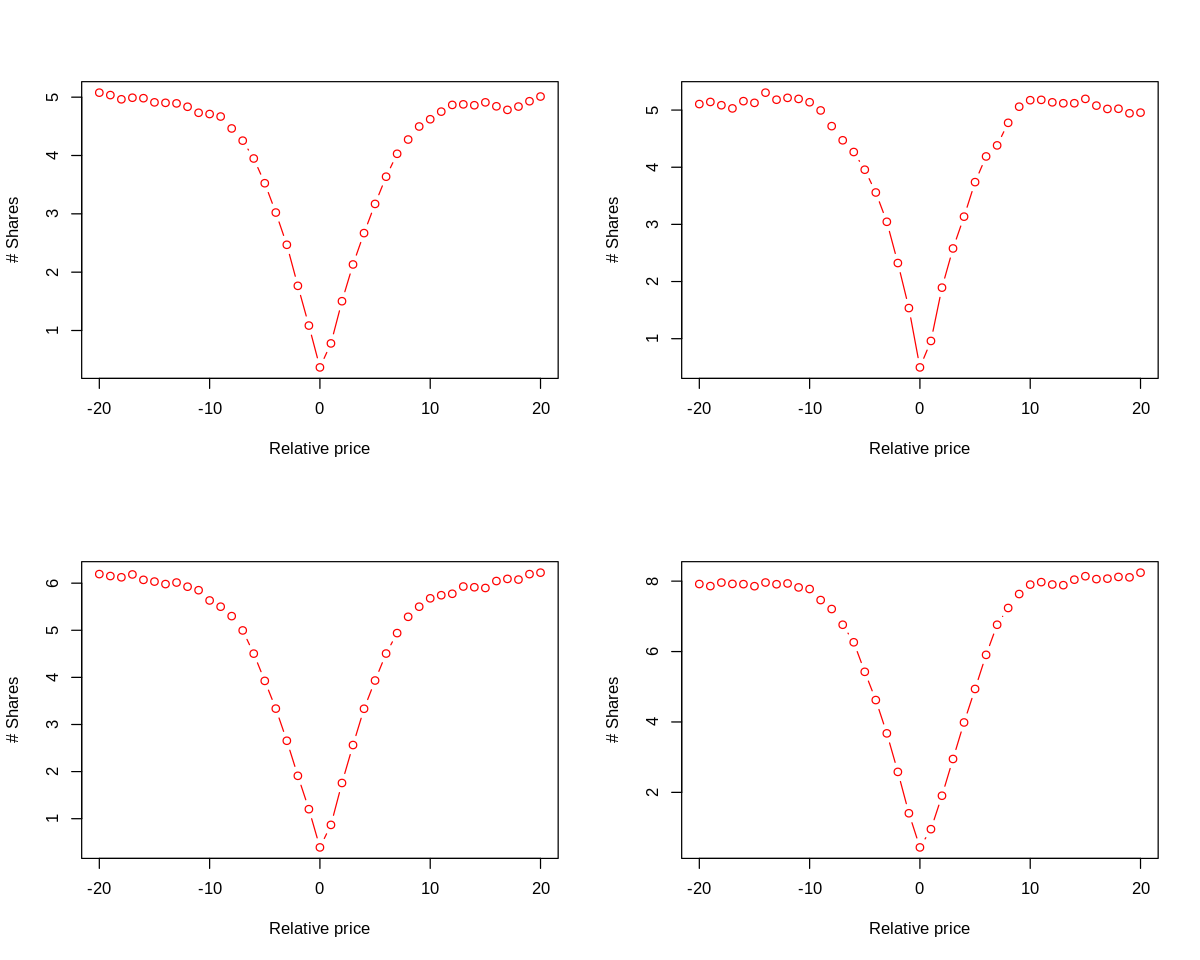

In [21]:
library(repr)
options(repr.plot.height=8)
par(mfrow=c(2,2))
for(i in 1:4){
    plot(-20:20,avgBookShapes[,i],main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")
}


### (c)

Firstly, we choose five points on both sides of mid-price(included) and do two linear regressions. The average coefficient of x is the actual slope.

We do this step in following code.

In [32]:
avgSlope<-c()
for(i in 1:4){
    # five points on both sides of mid-price(included)
    y1=avgBookShapes[17:21,i]
    y2=avgBookShapes[21:25,i]
    x=1:5
    
    # do regressions
    lm1<-lm(y1~x)
    lm2<-lm(y2~x)
    
    # average slope
    avgSlope<-c(avgSlope,(-lm1$coefficients[[2]]+lm2$coefficients[[2]])/2)
}
print(avgSlope)

[1] 0.6326205 0.7262395 0.7463760 0.9867200


Then we calculate the predicted slopes from dimensional analysis :

$$
\frac{\lambda^2}{\mu \nu}
$$
The slope for each parameters is :

|#|$\lambda$|$\mu$|$\nu$|predicted slopes
-----|-----|-----:|-------:|-----:|
I| 1 | 10 | $\frac15$ | 0.5 
II| 1 | 8 |  $\frac15$ | 0.625 
III| 1 |  10 | $\frac16$| 0.6 
IV| 1  | 10 | $\frac18$ | 0.8 

We draw graph about real slope v.s. predicted slope to see whether they have linear relationship

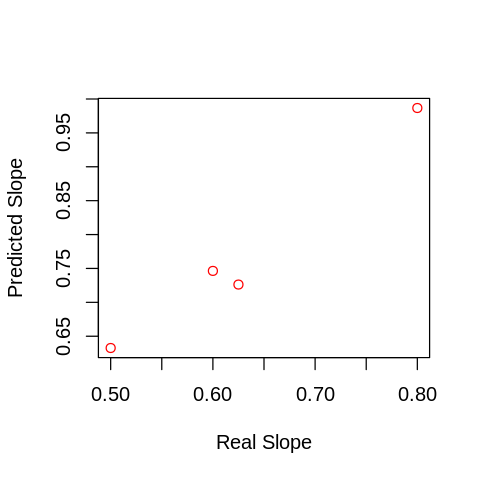

In [41]:
predSlope<-c(0.5,0.625,0.6,0.8)
options(repr.plot.height=4,repr.plot.width=4)
plot(predSlope,avgSlope,main=NA,xlab="Real Slope",ylab="Predicted Slope", col="red")

It seems linear so the real slope is consistent with predictions from dimensional analysis

### (d)
The predictions of asymptotic book depth from dimensional analysis is 

$$
\frac{\lambda}{\nu}
$$
The asymptotic book depth for each parameters which we read directly from the graphs is:

|#|$\lambda$|$\mu$|$\nu$|predicted depth|real depth
-----|-----|-----:|-------:|-----:|-----:|
I| 1 | 10 | $\frac15$ | 5 | 5
II| 1 | 8 |  $\frac15$ | 5 | 5
III| 1 |  10 | $\frac16$| 6|6
IV| 1  | 10 | $\frac18$ | 8|8

The real asymptotic book depth read from graph is consistent with predictions from dimensional analysis

### The following code sets up the data required for Problem 4.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 5. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the Santa Fe model with $\lambda = 1$, $\mu = 10$, and $\nu = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [6]:
head(data.frame(ziSimResults))

bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

### (a)

In [3]:
means<-c()
errors<-c()
imbalance<-c()
for(i in 1:10){
    lst<-ziSimResults[i]
    df<-data.frame(matrix(unlist(lst), ncol = 2, byrow=F))
    midPrice<-c()
    
    for(j in 1:10000){
        midPrice<-c(midPrice,(df[j,1]+df[j,2])/2)
    }
    
    means<-c(means,mean(midPrice))
    errors<-c(errors,sd(midPrice)/sqrt(length(midPrice)))
    imbalance<-c(imbalance,(i-1)/(i+1))
}

print("mean mid-price after 10,000 events:")
print(means)

print("standard deviation:")
print(errors)

[1] "mean mid-price after 10,000 events:"
 [1] 0.00590 0.21550 0.41350 0.56635 0.66850 0.74110 0.80530 0.80955 0.83880
[10] 0.83435
[1] "standard deviation:"
 [1] 0.015379863 0.014316301 0.013108355 0.012291150 0.011233583 0.010380166
 [7] 0.010190907 0.009888385 0.009779878 0.009617315


### (b)

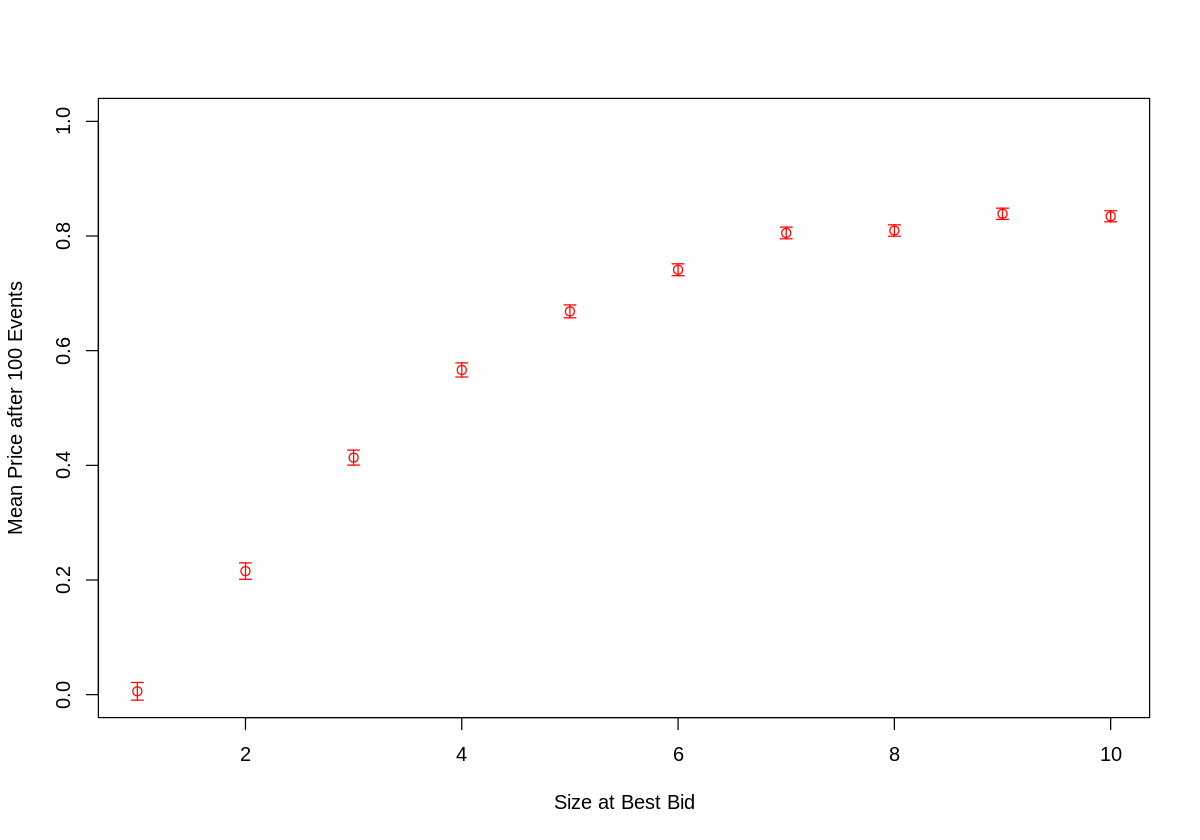

In [8]:
plot(1:10,means,ylim=range(c(0,1)),main=NA,xlab="Size at Best Bid",ylab="Mean Price after 100 Events", col="red")
arrows(1:10, means-errors, 1:10, means+errors, length=0.05, angle=90, code=3,col="red")

### (c)

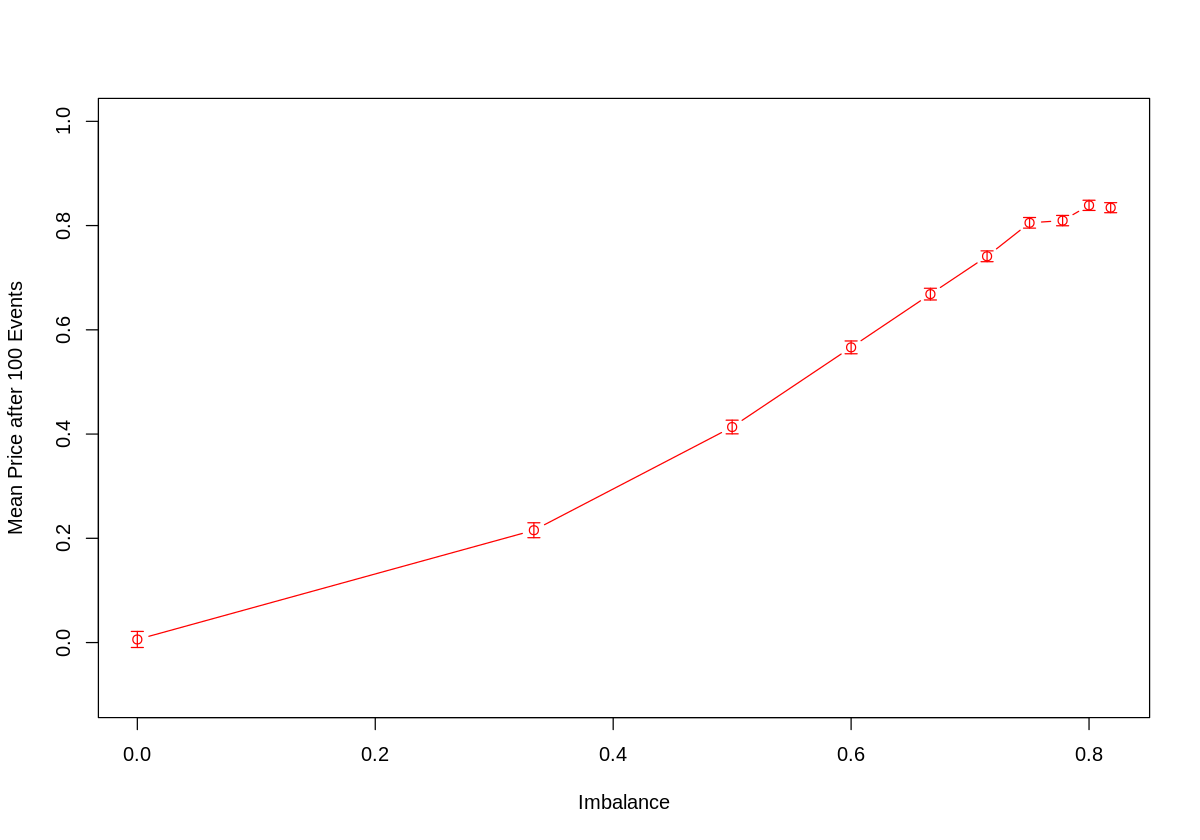

In [9]:
plot(imbalance,means,ylim=range(c(-0.1,1)),main=NA,xlab="Imbalance",ylab="Mean Price after 100 Events", col="red",type="b")
arrows(imbalance, means-errors, imbalance, means+errors, length=0.05, angle=90, code=3,col="red")


### (d)
The price is very likely to go up in the future

## Is the market price a martingale?

### 6. (4 points) 

A derivatives quant explains to you  (patiently but with a wthering look) that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

### Answer
It is not martingale. Because if we know all information up to now, we can see all orders on market then we can at least likely to predict whether the price will go up or down in the next moment.

The reason that the quant think that asset prices are martingales because he does not know all information on the market hence the price seems random to him. 